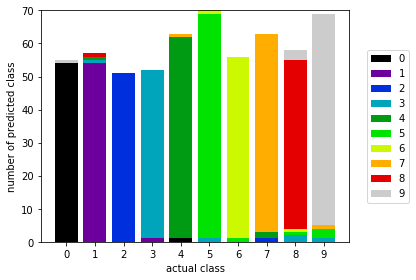

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import cm 
from sklearn.utils.multiclass import unique_labels 
from sklearn.metrics.classification import _check_targets


def plot_class_balance_preds(y_true, y_pred, labels=None, ax=None):
    # Use Sklearn tools to validate the target 
    # Note y_true and y_pred should already be label encoded 
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
    indices = unique_labels(y_true, y_pred)
        
    # Create a 2D numpy array where each row is the count of 
    # the predicted classes and each column is the true class 
    data = np.array([
        [(y_pred[y_true==label_t] == label_p).sum() for label_p in indices]
        for label_t in indices 
    ])
    
    # Ensure that the number of elements in data matches y_pred and y_true 
    # Not necessary but used as a sanity check
    assert data.sum() == len(y_pred) == len(y_true)
    
    # labels_present is the indices of the classes, labels is the string names 
    # Another sanity check, this will not prevent missing classes, which is bad
    labels = labels if labels is not None else indices
    assert len(labels) == len(indices)
    
    # Create a matplotlib axis 
    if ax is None:
        _, ax = plt.subplots()
      
    # Create a unique color for each predict class 
    colors = [cm.spectral(x) for x in np.linspace(0, 1, len(indices))]
    
    # Track the stack of the bar graph 
    prev = np.zeros(len(labels))
    
    # Plot each row 
    for idx, row in enumerate(data):
        ax.bar(indices, row, label=labels[idx], bottom=prev, color=colors[idx])
        prev += row 
    
    # Make the graph pretty 
    ax.set_xticks(indices)
    ax.set_xticklabels(labels)
    ax.set_xlabel("actual class")
    ax.set_ylabel("number of predicted class")

    # Put the legend outside of the graph 
    plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left")
    plt.tight_layout(rect=[0,0,0.85,1])
    
    return ax


## Usage 
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import GradientBoostingClassifier

digits = load_digits()
X_train, X_test, y_train, y_true = tts(digits.data, digits.target, test_size=0.33, random_state=42)

model = GradientBoostingClassifier() 
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
g = plot_class_balance_preds(y_true, y_pred, labels=digits.target_names)

plt.show()